In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

1) Delivery_time -> Predict delivery time using sorting time #2) Salary_hike -> Build a prediction model for Salary_hike

#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
# Read data 

df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
# data description

df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
# Data distrubution 

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

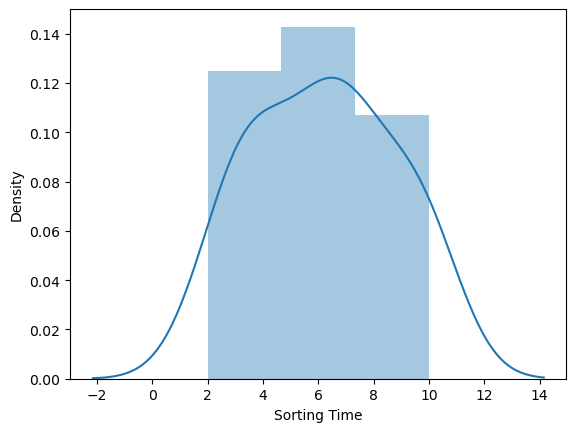

In [5]:
sns.distplot(df['Sorting Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

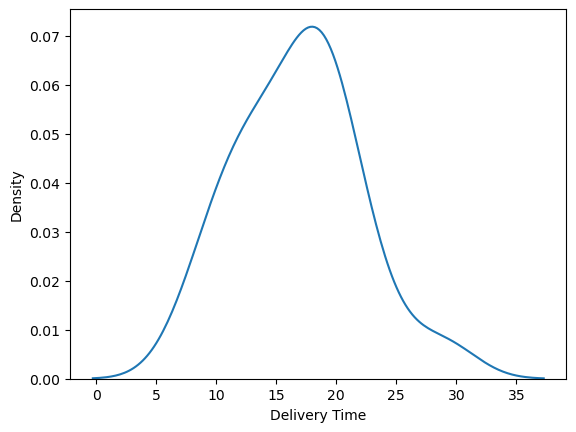

In [6]:
sns.kdeplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

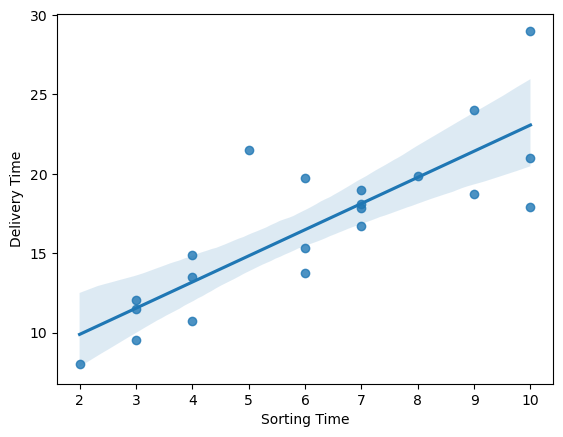

In [7]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

In [8]:
# Correlation analysis 

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

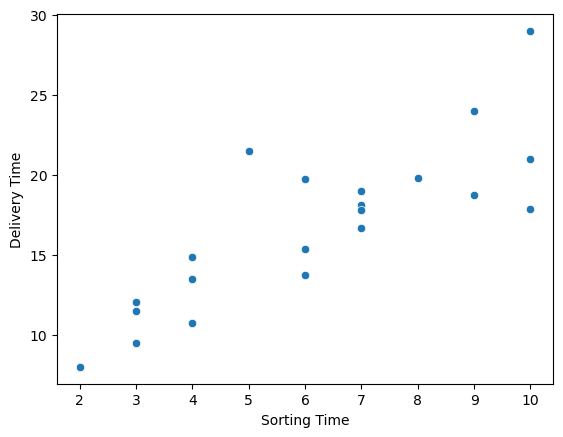

In [9]:
sns.scatterplot(df['Sorting Time'], df['Delivery Time'])

In [10]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

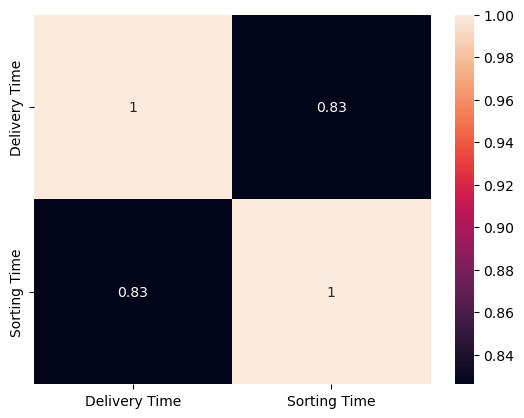

In [11]:
sns.heatmap(df.corr(), annot=True)

In [12]:
# Import statsmodels

In [13]:
import  statsmodels.formula.api as smf

In [14]:
# renaming the column 
df = df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [15]:
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
model = smf.ols("delivery_time~sorting_time",data=df).fit() 

In [17]:
# Model parameters

In [18]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        20:31:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#line equaton 

In [21]:
x = 15
y = 1.64*x+6.58
y


31.18

In [22]:
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}")


t value is
Intercept       3.823349
sorting_time    6.387447
dtype: float64
P value is
Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [23]:
# r2 value


In [24]:
model.rsquared

0.6822714748417231

In [25]:
# prediction for new data 

In [49]:
newdata = pd.Series([4,9])
newdata = pd.DataFrame(newdata, columns=['sorting_time'])

In [27]:
model.predict(newdata)

0    13.178814
1    21.423913
dtype: float64

# Q.No.2 

In [28]:
datadf = pd.read_csv('Salary_Data.csv')
datadf.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
datadf.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [50]:
datadf.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [51]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


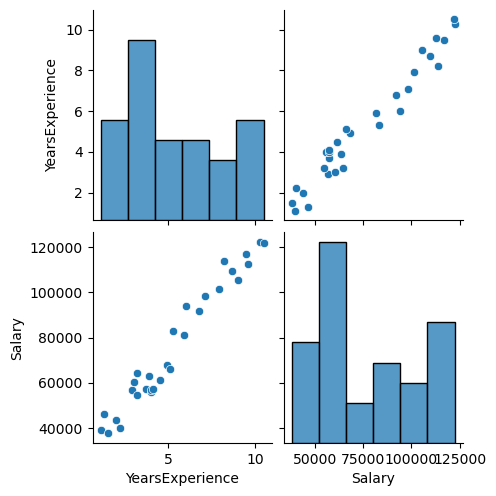

In [52]:
sns.pairplot(datadf)

In [30]:
# Data Distrubution

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

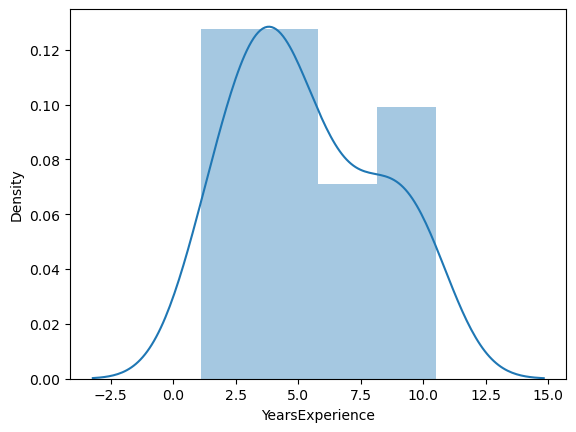

In [31]:
sns.distplot(datadf['YearsExperience']) 

<AxesSubplot:xlabel='Salary', ylabel='Density'>

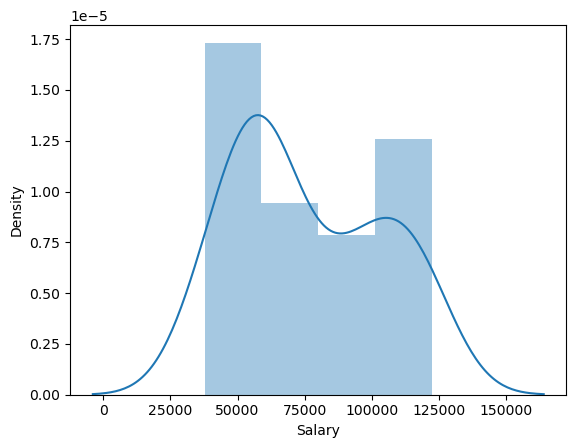

In [53]:
sns.distplot(datadf['Salary']) 

<AxesSubplot:xlabel='Salary', ylabel='Density'>

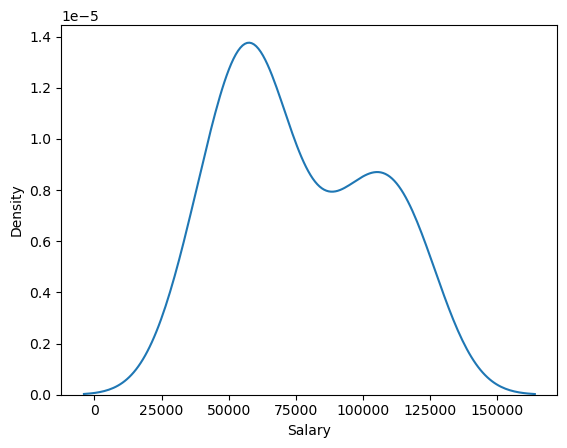

In [32]:
sns.kdeplot(datadf['Salary'])

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

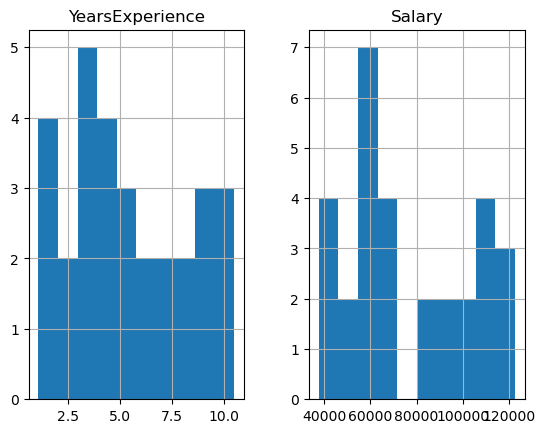

In [54]:
datadf.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x2bc19c0dd60>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc1adfdee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc181f1bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc1adfd760>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bc1adfd3a0>],
 'means': []}

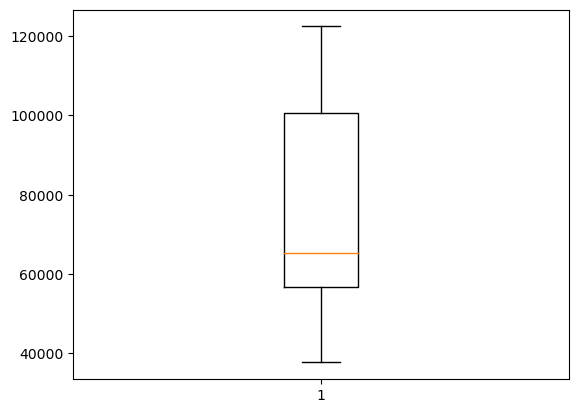

In [55]:
plt.boxplot(datadf.Salary)

In [33]:
# correlation analysis

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

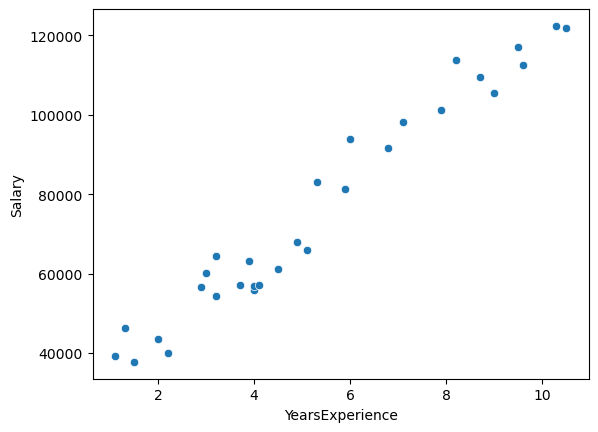

In [34]:
sns.scatterplot(datadf['YearsExperience'],datadf['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

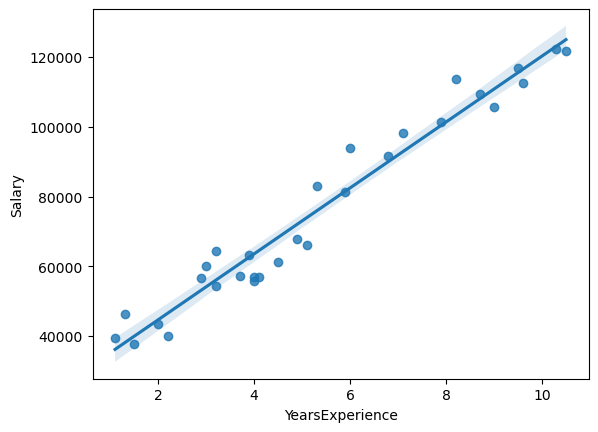

In [56]:
sns.regplot(x=datadf['YearsExperience'],y=datadf['Salary'])

In [35]:
datadf.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

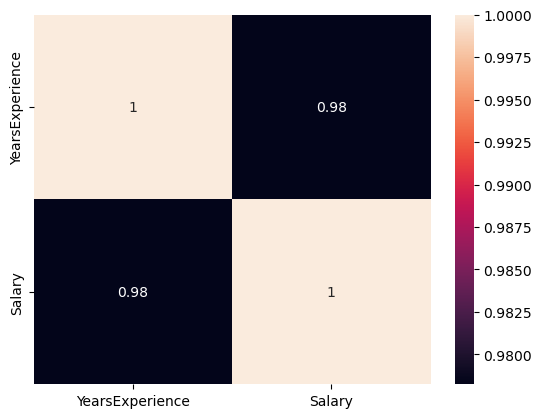

In [36]:
sns.heatmap(datadf.corr(), annot=True)

In [37]:
# Import Statsmodels

In [38]:
import statsmodels.formula.api as smf

In [39]:
model = smf.ols('Salary~YearsExperience',data=datadf).fit()

In [40]:
# Model parameter

In [41]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [42]:
#LIne equation 
x = 2.0
y = 9449.96*x+25792.20
y

44692.119999999995

In [43]:
#Print values for t value and p value
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}")

t value is
Intercept          11.346940
YearsExperience    24.950094
dtype: float64
P value is
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [44]:
# r2 value
model.rsquared

0.9569566641435086

In [45]:
# Prediction for new data 

In [46]:
newdata = pd.Series([10.5,11.7,15.5])

newdata = pd.DataFrame(newdata,columns=['YearsExperience'])

In [47]:
newdata

,YearsExperience
0,10.5
1,11.7
2,15.5


In [48]:
model.predict(newdata)

0    125016.804574
1    136356.759360
2    172266.616181
dtype: float64